C:\Users\TengMa\AppData\Local\Temp\ipykernel_23756\2591098358.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap("tab10")


0.1974501106453994


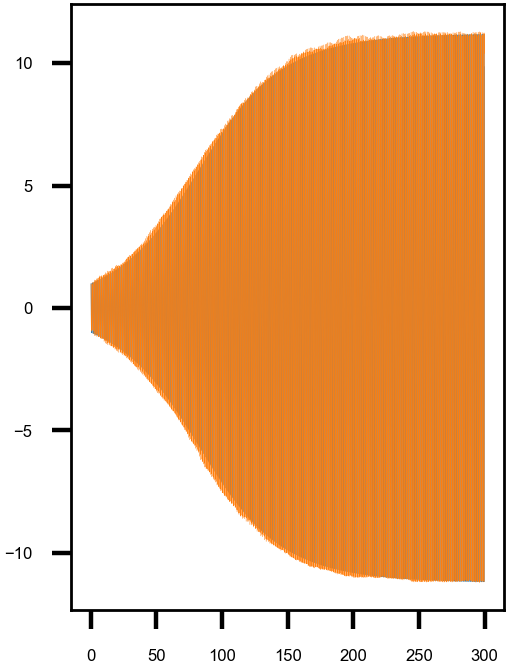

In [6]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import display, Markdown
# mpl.rc('text', usetex=True)
mpl.rc('font', family='Arial')
mpl.rc('font',size = 6)
mpl.rc('mathtext',fontset = 'stix')
mpl.rc('xtick', labelsize=3)
mpl.rc('ytick', labelsize=3)
mpl.rc('axes', labelsize=6)
mpl.rc('axes', labelpad=1)
mpl.rc('axes', titlesize=6)
mpl.rc('axes', linewidth=0.5)
mpl.rc('figure', figsize=(3.55/2.54, 5/2.54))
mpl.rc('figure', dpi=400)
mpl.rc('legend',frameon = False)
mpl.rc('savefig',pad_inches = 0.01)
cm_number = 10
cm = plt.cm.get_cmap("tab10")
colors = [cm(1. / (cm_number - 1) * i) for i in range(0, cm_number)]
from scipy.integrate import odeint
from sklearn.metrics import r2_score
library = [
    lambda x:x[1],
    lambda x:x[0]*x[0]*x[0],
    lambda x:x[1]*x[1]*x[1],
    lambda x:x[1]*x[1]*x[1]*x[1]*x[1]
]
library_name = [
    lambda x:x[1],
    lambda x:x[0]+'^3',
    lambda x:x[1]+'^3',
    lambda x:x[1]+'^5'
]

Coef = [4.742360e-02, -1.740934e-03, -4.641029e-06, 9.136575e-11]

datadir = "./data/U254_Z2S.csv"
data = pd.read_csv(datadir)
t = np.array(data['t'])
y = np.array(data['x'])

def preVIV(x,t):
    ddx = -1.630792e+02*x[0]
    for i in range(len(library)):
        ddx+=library[i](x)*Coef[i]
    dx = [x[1], ddx]
    return dx
predict = odeint(preVIV, [1,0], t=t)
plt.plot(t,predict[:,0],lw = 0.05)
plt.plot(t,y,lw = 0.05)
print(r2_score(predict[:,0],y))

In [7]:
import sys
sys.path.append("../Model")
import Model
from sympy import symbols, sin, cos

library_model = [
]
library_model_name = [
]
dim = 1
model = Model.WeakNO(dim,library_model,library_name)
model.Get_frequency(y.reshape(-1,1),t)
print("Identifed result: %.4f"%(model.frequencys[0]**2))
model.Get_Evolution(smooth_window = 1,height = 0.01)
amplitude_true = model.evolutions[0,0,:]
phase_true = model.evolutions[1,0,:]
t_etrue = model.t_evolutions

model = Model.WeakNO(dim,library_model,library_name)
model.Get_frequency(predict[:,0].reshape(-1,1),t)
print("Identifed result: %.4f"%(model.frequencys[0]**2))
model.Get_Evolution(smooth_window = 1,height = 0.01)
amplitude_pre = model.evolutions[0,0,:]
phase_pre = model.evolutions[1,0,:]
t_epre = model.t_evolutions

Identifed result: 163.0792
Identifed result: 163.0792


0.9999975326411493
Identifed result: 163.4467
Identifed result: 163.4467


C:\Users\TengMa\anaconda3\Lib\site-packages\scipy\integrate\_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


Identifed result: 163.4467
Identifed result: 163.4467


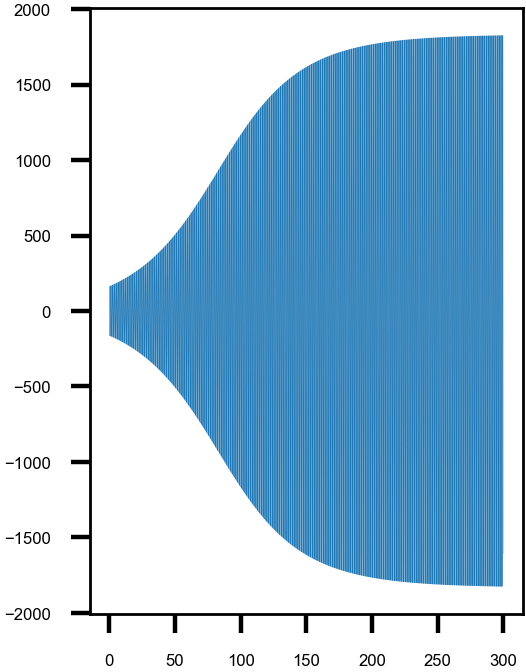

In [8]:
plt.plot(t,-1.633239e+02*predict[:,0],lw = 0.05)

ddx = np.gradient(predict[:,1],t)
print(r2_score(-1.633239e+02*predict[:,0],ddx))
derivative = []
dynamics = []
predicts = []
Amplitudes = []
Phases = []
t_e = []
for i in range(len(library)):
    ddotx = np.gradient(predict[:,1],t)
    derivative_lib = ddotx - library[i](predict.T)*Coef[i]
    # derivative.append(r2_score(derivative_lib,ddotx))
    derivative.append(np.linalg.norm(ddotx-derivative_lib)/np.linalg.norm(ddotx))
    
    # plt.subplots()
    # plt.plot(t,derivative_lib,lw = 0.05,color = colors[i])
    # plt.plot(t,ddotx,lw = 0.05)
    def delib(x,t):
        ddx = -1.633239e+02*x[0]
        for j in range(len(library)):
            if j!=i:
                ddx+=library[j](x)*Coef[j]
        dx = [x[1], ddx]
        return dx
    predict_lib = odeint(delib, [1,0],t)
    model.Get_frequency(predict_lib[:,0].reshape(-1,1),t)
    # model.frequencys[0] = np.sqrt(163.0792)
    print("Identifed result: %.4f"%(model.frequencys[0]**2))
    model.Get_Evolution(smooth_window = 1,height = 0.01)
    Amplitudes.append(model.evolutions[0,0,:])
    Phases.append(model.evolutions[1,0,:])
    t_e.append(model.t_evolutions)
    
    predicts.append(predict_lib)
    # plt.subplots()
    # plt.plot(t,predict_lib[:,0],lw = 0.05,color = colors[i])
    # plt.plot(t,y,lw = 0.05)
    # dynamics.append(r2_score(y,predict_lib[:,0]))
    dynamics.append(np.linalg.norm(predict[:,0]-predict_lib[:,0])/np.linalg.norm(predict[:,0]))

In [9]:
print(dynamics)

[0.9772161632306395, 1.2442857552515434, 1.035286863713248, 1.4352382578800875]


In [10]:
termlabel = []
basis = ['x','\dot{x}']
for i in range(4):
    x = r'$%s$'%(library_name[i](basis))
    termlabel.append(r"%.3e%s"%(Coef[i],x))
print(termlabel)

['4.742e-02$\\dot{x}$', '-1.741e-03$x^3$', '-4.641e-06$\\dot{x}^3$', '9.137e-11$\\dot{x}^5$']


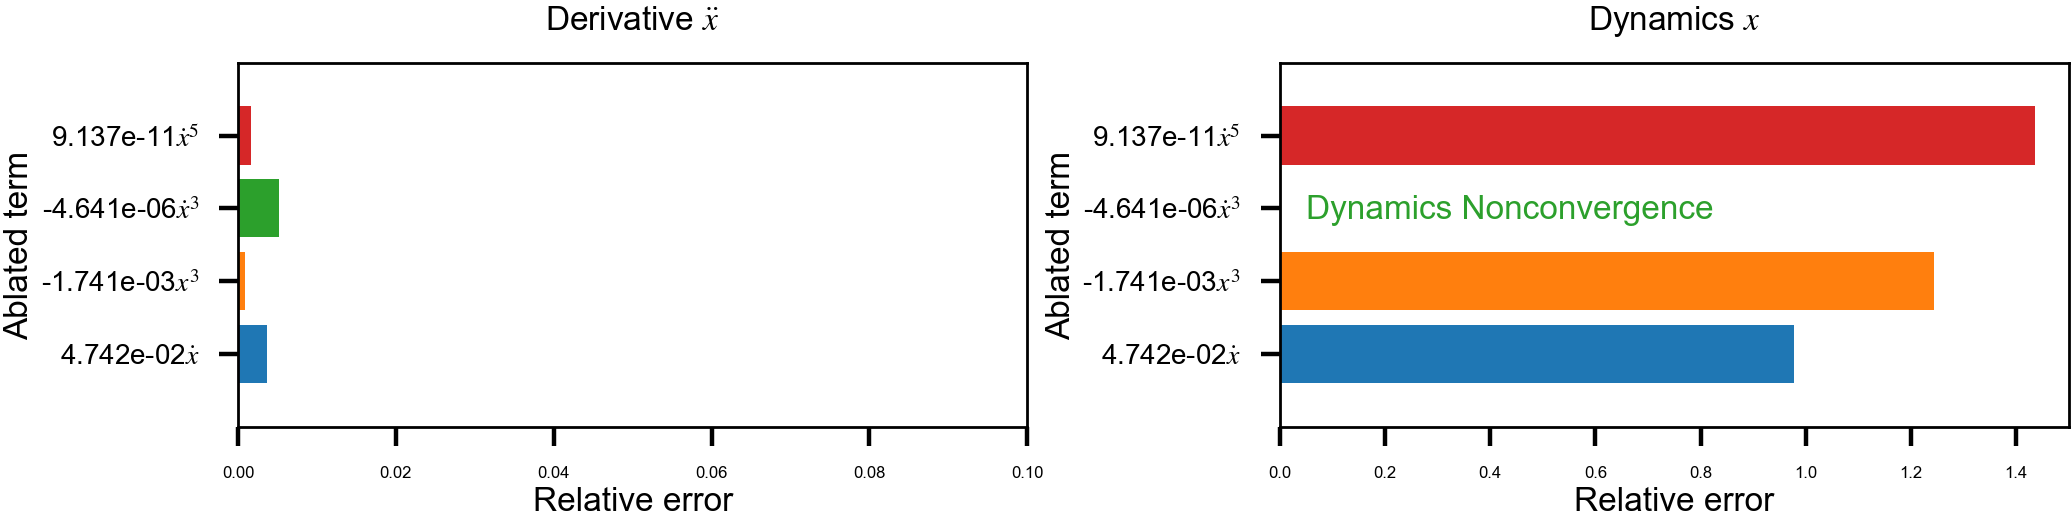

In [16]:
fig,axes = plt.subplots(1,2,figsize = (15/2.54,3/2.54))
plt.subplots_adjust(wspace = 0.32)
plt.subplot(1,2,1)
ax = axes[0]
for i in range(4):
    ax.barh(0.75+0.5*i, derivative[i], height = 0.4,color = colors[i])
ax.set_xlim(0,0.1)
ax.set_ylim(0.25,2.75)
ax.set_yticks([0.75,1.25,1.75,2.25])
ax.set_yticklabels(termlabel,fontsize = 5)
ax.set_xlabel("Relative error")
ax.set_ylabel("Ablated term")
ax.set_title(r"Derivative $\ddot{x}$")
# plt.savefig('./Fig/Supplement/Ablotion_VIV_deri.pdf',dpi = 600,transparent = True,bbox_inches="tight")
# fig,ax = plt.subplots(figsize = (7.5/2.54,3/2.54))
plt.subplot(1,2,2)
ax = axes[1]
for i in range(4):
    if i == 2:
        continue
    ax.barh(0.75+0.5*i, dynamics[i], height = 0.4,color = colors[i])
ax.text(s="Dynamics Nonconvergence", x = 0.05,y = 1.68,color = colors[2],fontsize = 6)
ax.set_xlim(0,1.5)
ax.set_ylim(0.25,2.75)
ax.set_yticks([0.75,1.25,1.75,2.25])
ax.set_yticklabels(termlabel,fontsize = 5)
ax.set_xlabel("Relative error")
ax.set_ylabel("Ablated term")
ax.set_title(r"Dynamics $x$")
plt.savefig('./Fig/Supplement/Ablotion_VIV_quan.svg',dpi = 600,transparent = True,bbox_inches="tight")

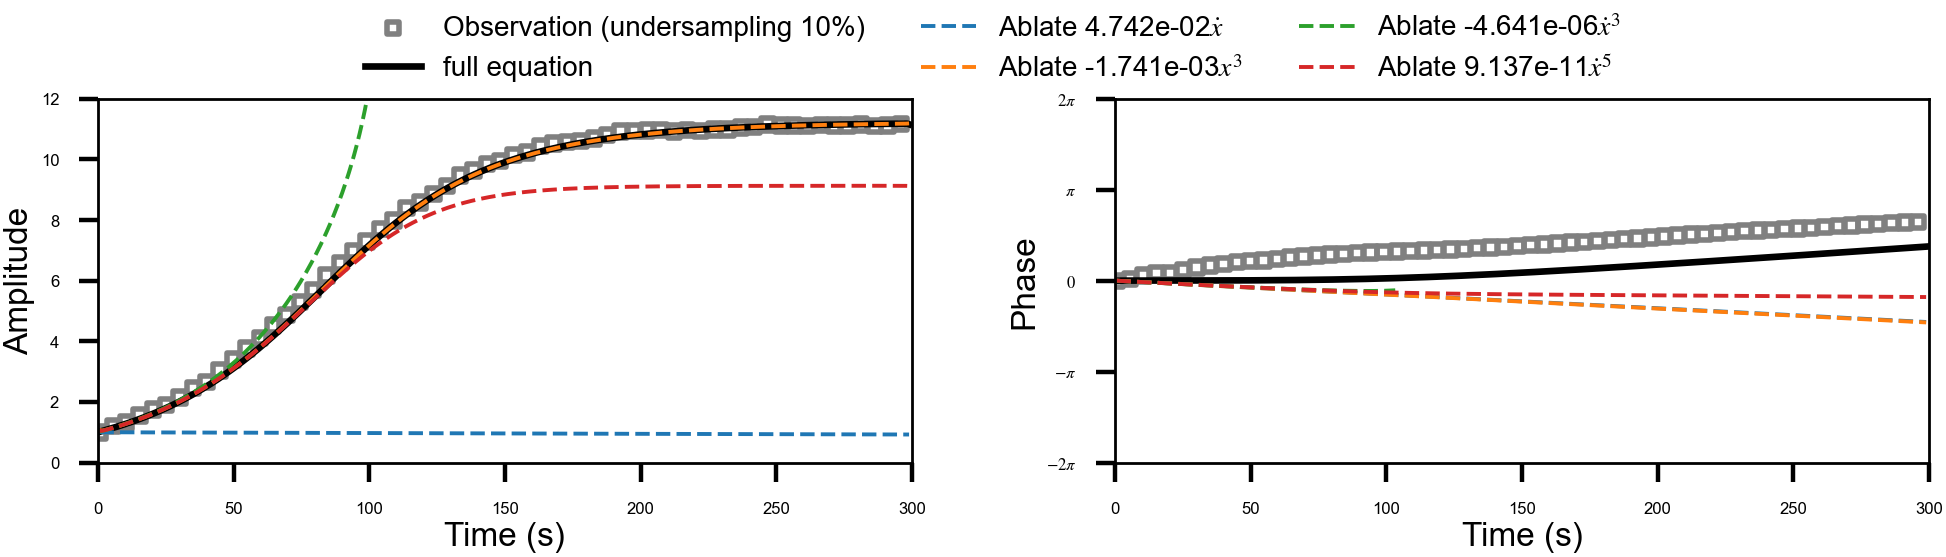

In [17]:
fig,ax = plt.subplots(1,2,figsize = (15/2.54,3/2.54))
plt.subplots_adjust(wspace = 0.25)
plt.subplot(1,2,1)
plt.scatter(t_etrue[::10], amplitude_true[::10],marker = 's',color = 'none',s = 5,alpha = 1,edgecolors = 'gray',label = 'Observation (undersampling 10%)')
plt.plot(t_epre, amplitude_pre, color = 'black',lw = 1.2, alpha = 1,label = 'full equation')
for i in range(4):
    if i ==2:
        plt.plot(t_e[i][:210],Amplitudes[i][:210],color = colors[i],lw = 0.7, ls = '--',alpha = 1,label = "Ablate %s"%termlabel[i])
    else:
        plt.plot(t_e[i],Amplitudes[i][:],color = colors[i],lw = 0.7, ls = '--',alpha = 1,label = "Ablate %s"%termlabel[i])
plt.xlim(0,300)
plt.ylim(0,12)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend(ncol = 3, loc="upper center"  ,fontsize = 5, bbox_to_anchor = (1.1,1.3))
plt.subplot(1,2,2)
plt.scatter(t_etrue[::10], phase_true[::10],marker = 's',color = 'none',s = 5,alpha = 1,edgecolors = 'gray')
plt.plot(t_epre, phase_pre,color = 'black',lw = 1.2, alpha = 1)
for i in range(4):
    if i ==2:
        plt.plot(t_e[i][:210],Phases[i][:210],color = colors[i],lw = 0.7, ls = '--',alpha = 1)
    else:
        plt.plot(t_e[i],Phases[i][:],color = colors[i],lw = 0.7, ls = '--',alpha = 1)
plt.xlim(0,300)
plt.ylim(-2*np.pi,2*np.pi)
plt.yticks(np.linspace(-2*np.pi,2*np.pi,5))
ax[1].set_yticklabels([r"$-2\pi$",r'$-\pi$','$0$','$\pi$',r'$2\pi$'])
plt.xlabel("Time (s)")
plt.ylabel("Phase")
plt.savefig('./Fig/Supplement/Ablotion_VIV_Amathcing.svg',dpi = 600,transparent = True,bbox_inches="tight")

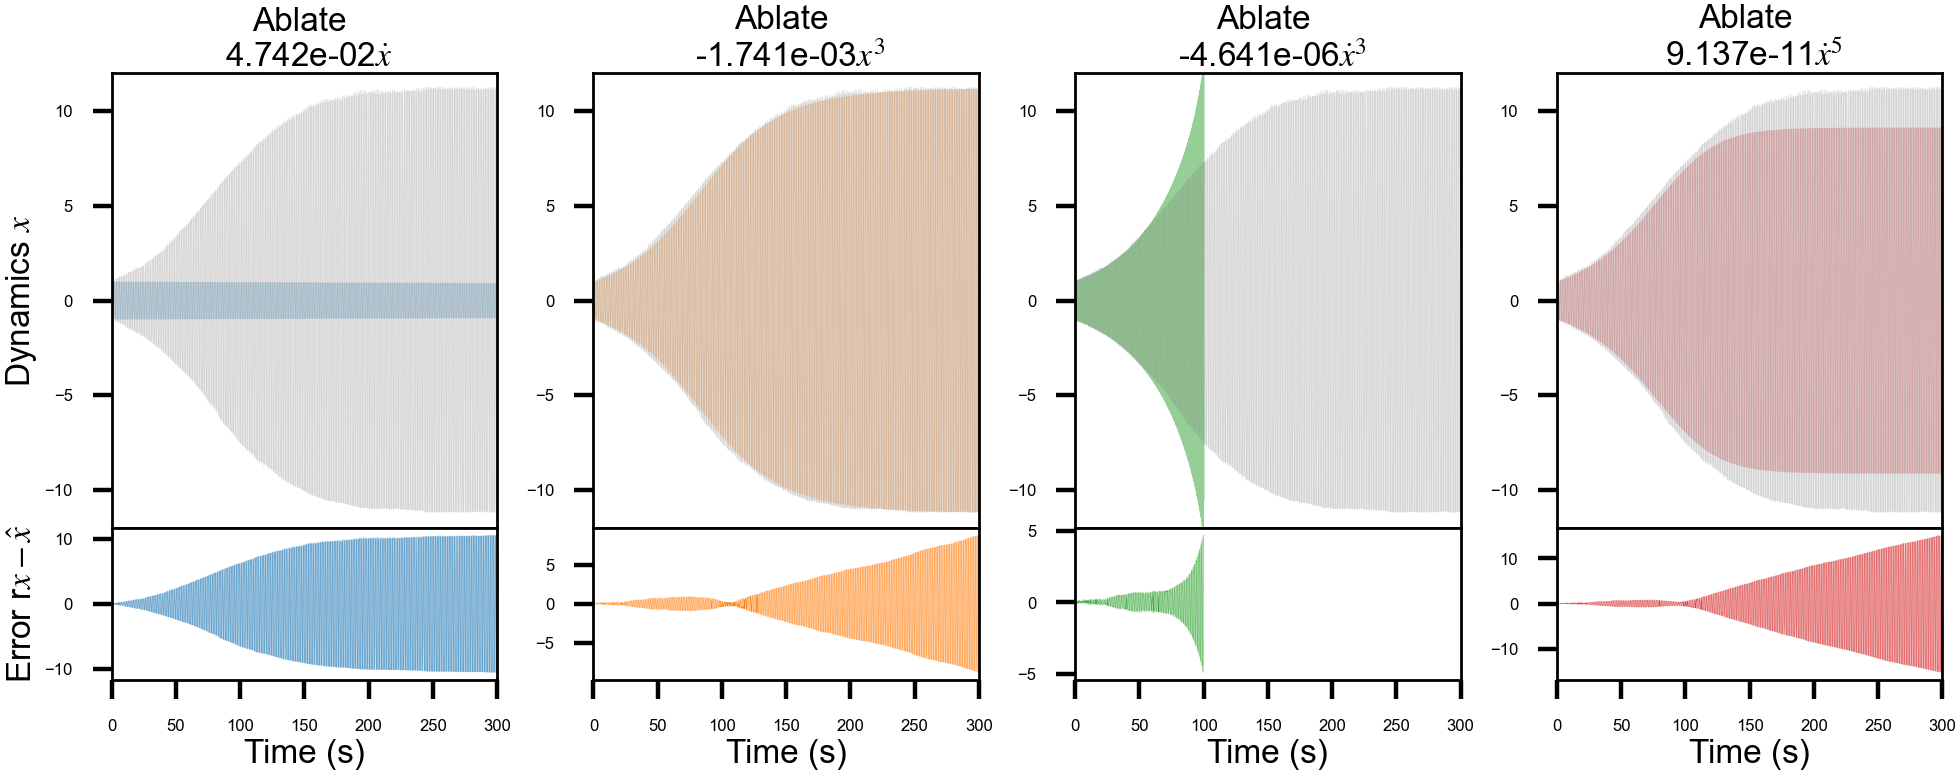

In [18]:
fig,ax = plt.subplots(2,4,figsize = (15/2.54,5/2.54),height_ratios=[3,1])
plt.subplots_adjust(wspace = 0.25,hspace = 0)
for i in range(4):
    if i == 2:
        ax[0][i].plot(t[:30000],predicts[i][:30000,0],lw = 0.3,alpha=0.5,color = colors[i])
        ax[1][i].plot(t[:30000],y[:30000] - predicts[i][:30000,0],lw = 0.03,color = colors[i])
    else:
        ax[1][i].plot(t,y - predicts[i][:,0],lw = 0.03,color = colors[i])
        ax[0][i].plot(t,predicts[i][:,0],lw = 0.03,alpha=0.5,color = colors[i])
    ax[0][i].plot(t,y,lw = 0.03, alpha = 0.5,color = 'gray')
    ax[0][i].set_xlim(0,300)
    ax[0][i].set_ylim(-12,12)
    ax[0][i].set_xticks([])
    ax[1][i].set_xlim(0,300)
    ax[1][i].set_xlabel('Time (s)')
    ax[0][i].set_title("Ablate \n %s"%termlabel[i],pad = 0.1)
    if i==0:
        ax[0][i].set_ylabel("Dynamics $x$")
        ax[1][i].set_ylabel("Error r$x-\hat{x}$")
plt.savefig('./Fig/Supplement/Ablotion_VIV_Error.svg',dpi = 600,transparent = True,bbox_inches="tight")